# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# Step 1: Import Required Libraries

In [1]:
import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


# Step 2: Load Dataset

In [29]:
excel_file = "data/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"
years = range(2010, 2017)

# df = pd.read_excel(r"path_data.xlsx")

In [31]:
years[0]



2010

In [32]:
# Safely attempt to load the first-year commodity sheet and give helpful diagnostics if it fails
if os.path.exists(excel_file):
    try:
        df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
    except ValueError as e:  # common when sheet name is missing
        print(f"Sheet '{years[0]}_Detail_Commodity' not found or invalid sheet name: {e}")
        try:
            xl = pd.ExcelFile(excel_file)
            print("Available sheets:", xl.sheet_names)
        except Exception as e2:
            print("Could not read sheet names:", e2)
        df_1 = pd.DataFrame()
    except Exception as e:
        print("Error reading excel file:", e)
        df_1 = pd.DataFrame()
else:
    print(f"Excel file not found at: {excel_file}")
    # show any Excel files in current working directory for debugging
    try:
        local_excels = [f for f in os.listdir('.') if f.lower().endswith(('.xlsx', '.xls'))]
        print("Excel files in current directory:", local_excels)
    except Exception as e:
        print("Could not list current directory:", e)
    df_1 = pd.DataFrame()
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [33]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [34]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [35]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


# Step 3: Data Preprocessing

In [36]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [37]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)
df

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.009,0.0,0.009,4,2,1,5,1,Industry,2016
22088,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.0,0.000,4,2,1,5,1,Industry,2016
22089,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.0,0.000,4,2,1,5,1,Industry,2016
22090,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.0,0.000,4,2,1,5,1,Industry,2016


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [40]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

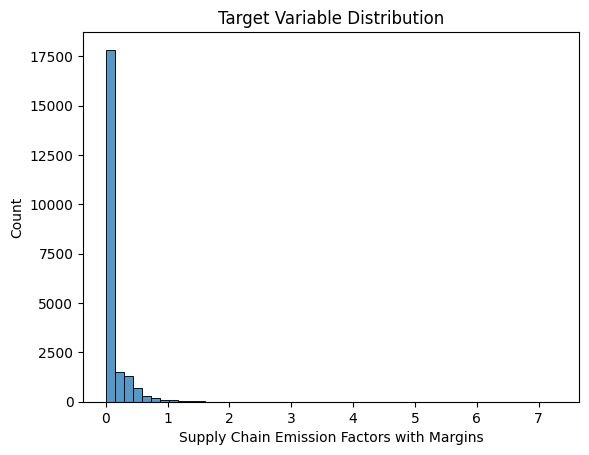

In [41]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [42]:
# Check categorical variables
counts_substance=df['Substance'].value_counts()
counts_substance=pd.Series(index=counts_substance.index,data=counts_substance.values)
counts_substance


Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
dtype: int64

In [43]:
counts_units=df['Unit'].value_counts()
counts_units=pd.Series(data=counts_units.values,index=counts_units.index)
counts_units

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
dtype: int64

In [44]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [45]:
df['Substance']=df['Substance'].map(substance_map)

In [46]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [47]:
df['Unit']=df['Unit'].map(unit_map)

In [48]:
source_map={'Commodity':0, 'Industry':1}

In [49]:
df['Source']=df['Source'].map(source_map)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [51]:
len(df.Name.unique())

713

In [52]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Name','Code','Year'], inplace=True)

In [53]:
col=df.select_dtypes(include='object').columns
col

Index(['Margins of Supply Chain Emission Factors'], dtype='object')

In [54]:
print(df['Margins of Supply Chain Emission Factors'].unique())
def convtofl(val):
    try:
        return float(val)
    except (ValueError, TypeError):
        return 0.0
    

[0.073 0.001 0.0 0.081 0.132 0.121 0.096 0.075 0.057 0.064 0.072 0.076
 0.11 0.082 0.196 0.002 0.078 0.071 0.128 0.173 0.08 0.039 0.037 0.03
 0.007 0.099 0.091 0.093 0.058 0.063 0.074 0.049 0.059 0.06 0.066 0.061
 0.1 0.043 0.045 0.01 0.035 0.051 0.117 0.17 0.095 0.089 0.062 0.028 0.25
 0.921 0.005 0.251 1.901 0.009 0.82 0.004 0.047 0.07 0.056 0.034 0.05
 0.172 0.052 0.033 0.127 0.069 0.085 0.041 0.017 0.018 0.032 0.293 0.188
 0.016 0.053 0.024 0.012 0.013 0.126 0.021 0.226 0.13 0.109 0.119 0.12
 0.161 0.256 0.003 0.088 0.036 0.044 0.042 0.02 0.027 0.155 0.04 0.055
 0.067 0.334 0.294 0.115 0.054 0.112 0.104 0.046 0.038 0.029 0.341 0.47
 0.193 0.168 1.226 0.006 0.019 0.142 0.209 0.229 0.796 0.269 0.217 0.105
 0.218 0.09 0.031 0.022 0.008 0.011 0.026 0.077 0.068 0.266 0.873 0.257
 0.539 0.204 0.103 0.321 0.277 0.187 0.414 3.349 0.107 0.048 0.14 0.162
 0.139 0.014 0.122 0.023 0.113 0.178 0.102 0.079 0.147 0.124 0.025 0.065
 0.137 0.16 0.211 0.084 0.015 0.129 0.101 0.106 0.118 0.189 0.166 

In [55]:
df['Margins of Supply Chain Emission Factors']=df['Margins of Supply Chain Emission Factors'].apply(convtofl)
df['Margins of Supply Chain Emission Factors']

0        0.073
1        0.001
2        0.000
3        0.000
4        0.081
         ...  
22087    0.000
22088    0.000
22089    0.000
22090    0.000
22091    0.000
Name: Margins of Supply Chain Emission Factors, Length: 22092, dtype: float64

In [56]:
col=df.select_dtypes(include='object').columns
col

Index([], dtype='object')

In [57]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [58]:
print(df['DQ GeographicalCorrelation of Factors without Margins'].nunique())  
print(df['DQ GeographicalCorrelation of Factors without Margins'].std())   

1
0.0


In [59]:
df.drop(columns=['DQ GeographicalCorrelation of Factors without Margins','DQ DataCollection of Factors without Margins'],axis=1,inplace=True)
df

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,Source
0,0,0,0.398,0.073,0.470,4,3,4,0
1,1,0,0.001,0.001,0.002,4,3,1,0
2,2,0,0.002,0.000,0.002,4,3,4,0
3,3,1,0.002,0.000,0.002,3,3,3,0
4,0,0,0.659,0.081,0.740,4,3,4,0
...,...,...,...,...,...,...,...,...,...
22087,3,1,0.009,0.000,0.009,4,2,5,1
22088,0,0,0.000,0.000,0.000,4,2,5,1
22089,1,0,0.000,0.000,0.000,4,2,5,1
22090,2,0,0.000,0.000,0.000,4,2,5,1


In [60]:
# Define features and target
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

In [61]:
print(X.head())


   Substance  Unit  Supply Chain Emission Factors without Margins  \
0          0     0                                          0.398   
1          1     0                                          0.001   
2          2     0                                          0.002   
3          3     1                                          0.002   
4          0     0                                          0.659   

   Margins of Supply Chain Emission Factors  \
0                                     0.073   
1                                     0.001   
2                                     0.000   
3                                     0.000   
4                                     0.081   

   DQ ReliabilityScore of Factors without Margins  \
0                                               4   
1                                               4   
2                                               4   
3                                               3   
4                                    

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ TechnologicalCorrelation of Factors without Margins  22092 non-null  int64  
 8   Source                               

In [63]:
df.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,Source
0,0,0,0.398,0.073,0.470,4,3,4,0
1,1,0,0.001,0.001,0.002,4,3,1,0
2,2,0,0.002,0.000,0.002,4,3,4,0
3,3,1,0.002,0.000,0.002,3,3,3,0
4,0,0,0.659,0.081,0.740,4,3,4,0


In [64]:
y

0        0.470
1        0.002
2        0.002
3        0.002
4        0.740
         ...  
22087    0.009
22088    0.000
22089    0.000
22090    0.000
22091    0.000
Name: Supply Chain Emission Factors with Margins, Length: 22092, dtype: float64

In [65]:
corrolation=X.corrwith(y)
corrolation.sort_values(ascending=False)

Supply Chain Emission Factors without Margins             0.962971
Margins of Supply Chain Emission Factors                  0.404541
DQ TechnologicalCorrelation of Factors without Margins    0.160574
DQ TemporalCorrelation of Factors without Margins         0.010748
Source                                                    0.006688
DQ ReliabilityScore of Factors without Margins           -0.109494
Unit                                                     -0.169741
Substance                                                -0.421603
dtype: float64

## Normalize features

#### Divide the data into train and test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Select the model for training

In [67]:
model = RandomForestRegressor(random_state=42)

### Training

In [68]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Prediction anf Evaluation

In [69]:
y_pred = model.predict(X_test)
# r2_sccore approx 1 gives us perfecr model

In [70]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.0059132430464709325
R² Score: 0.9993774953792869


### Hyperparameter Tuning

In [71]:
# When the model performs very well on the training data we say that it is overfit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


### Use best parameters for prediction

In [72]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))
print('Train Accuracy: ',best_model.score(X_train,y_train))

Final RMSE: 0.00604257862440759
Final R²: 0.9993499664984037
Train Accuracy:  0.9998780700904902


### Save model and encoders

In [74]:
!mkdir models

In [75]:
# Save model and encoders
joblib.dump(best_model, 'models/final_model.pkl')   



['models/final_model.pkl']

In [76]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins', 'Source'],
      dtype='object')